In [1]:
%config InlineBackend.figure_format = 'retina'

from utils.utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import time
import progressbar
import warnings

sns.set()
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\10356\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ts = get_flow_series_by_idx(6)
ts = ts.resample('15min').sum()

test_size = 4*24*7
train_ts = ts[:-test_size]
test_ts = ts[-test_size:]

decomposition = sm.tsa.seasonal_decompose(ts, period=4*24, two_sided=False)  # 末尾不缺失

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

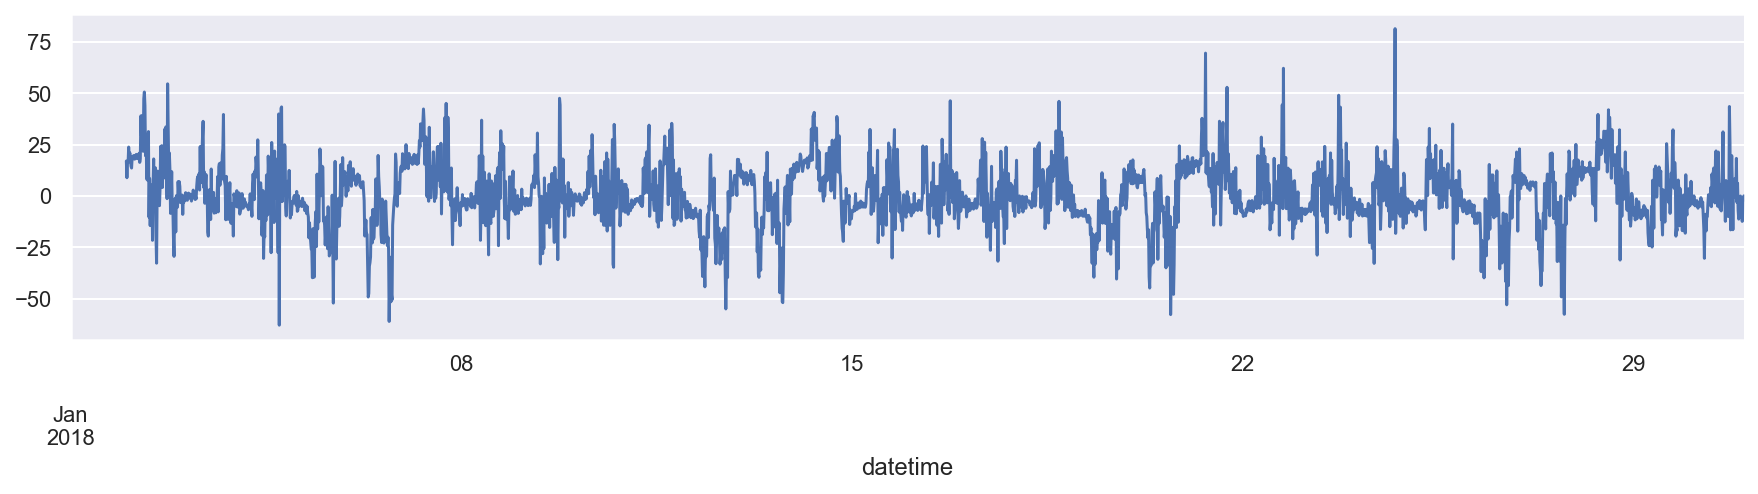

In [3]:
residual.plot(figsize=(15,3))

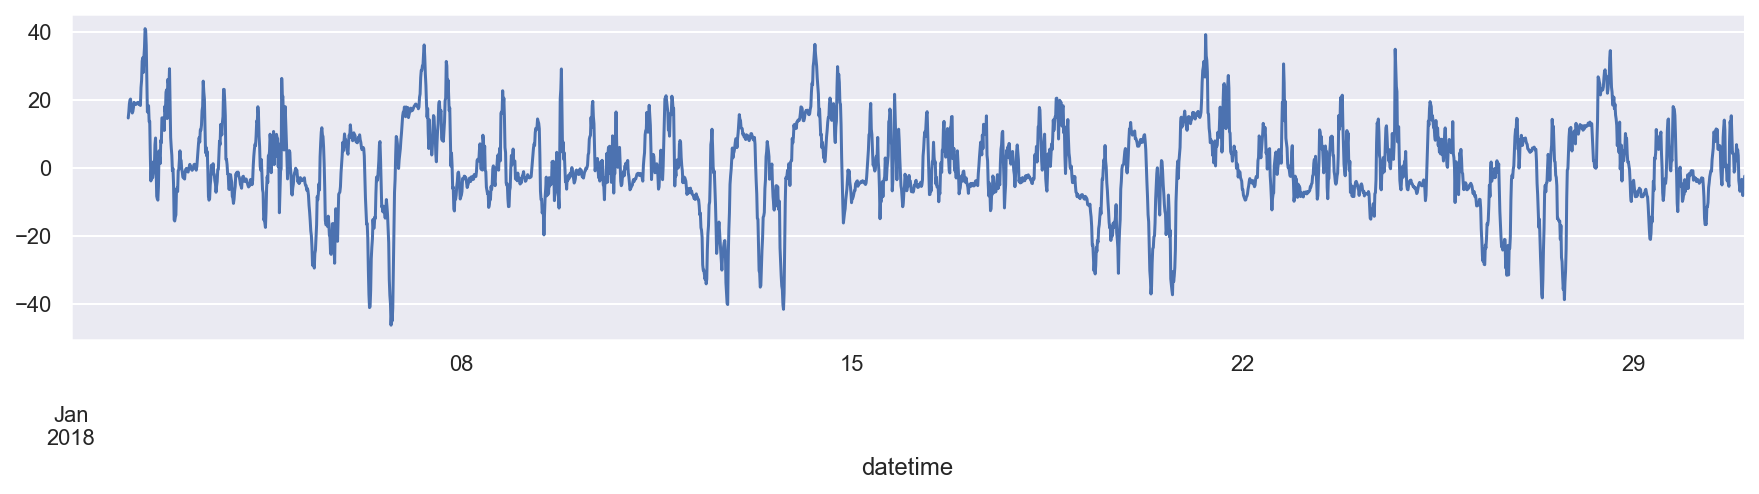

In [11]:
residual.rolling(4).mean().plot(figsize=(15,3))

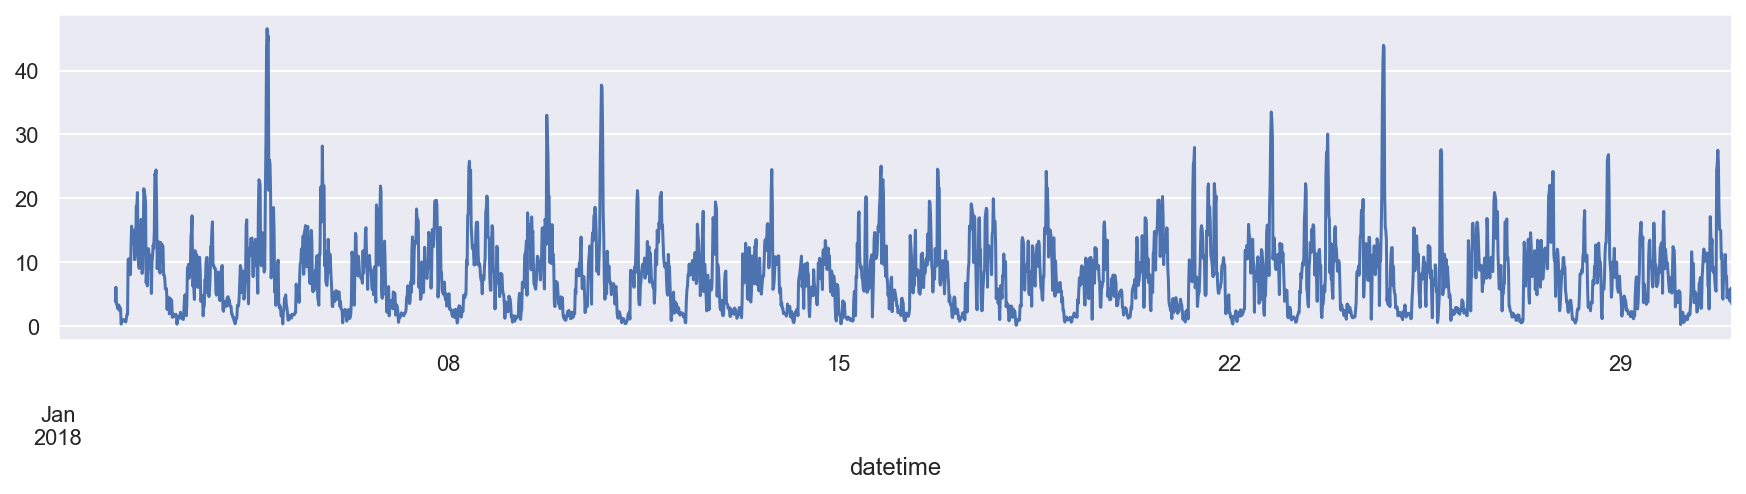

In [12]:
residual.rolling(4).std().plot(figsize=(15,3))

In [4]:
df = pd.DataFrame(residual.dropna())

In [5]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday

In [6]:
df

,resid,hour,weekday
datetime,,,
2018-01-02 00:00:00,16.996019,0,1
2018-01-02 00:15:00,8.840128,0,1
2018-01-02 00:30:00,16.349467,0,1
2018-01-02 00:45:00,16.257693,0,1
2018-01-02 01:00:00,23.778167,1,1
...,...,...,...
2018-01-30 22:45:00,-12.403047,22,1
2018-01-30 23:00:00,-7.549599,23,1
2018-01-30 23:15:00,-0.420827,23,1


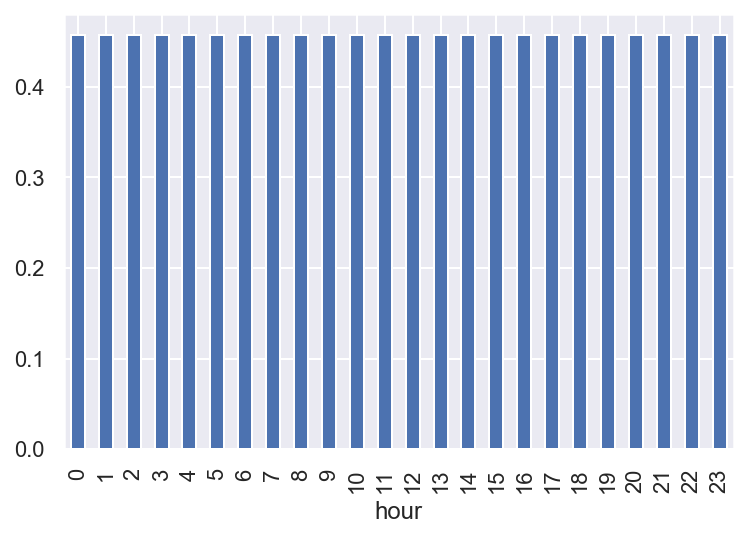

In [7]:
df.groupby('hour').mean()['resid'].plot(kind='bar')

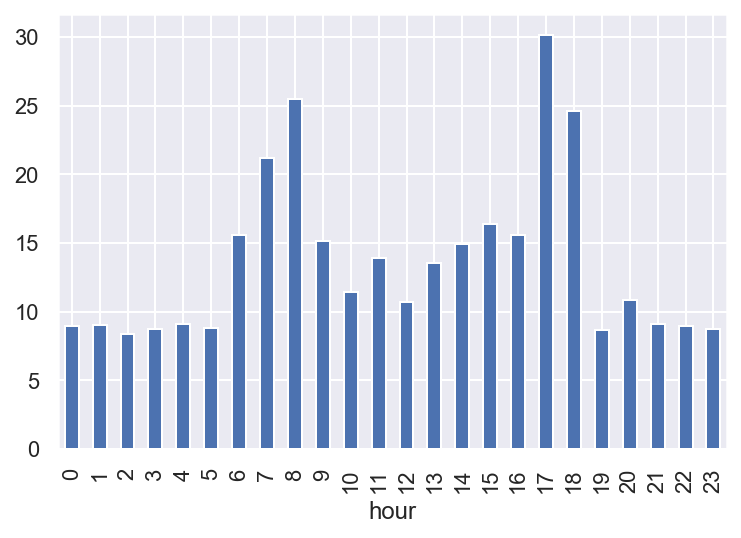

In [8]:
df.groupby('hour').std()['resid'].plot(kind='bar')

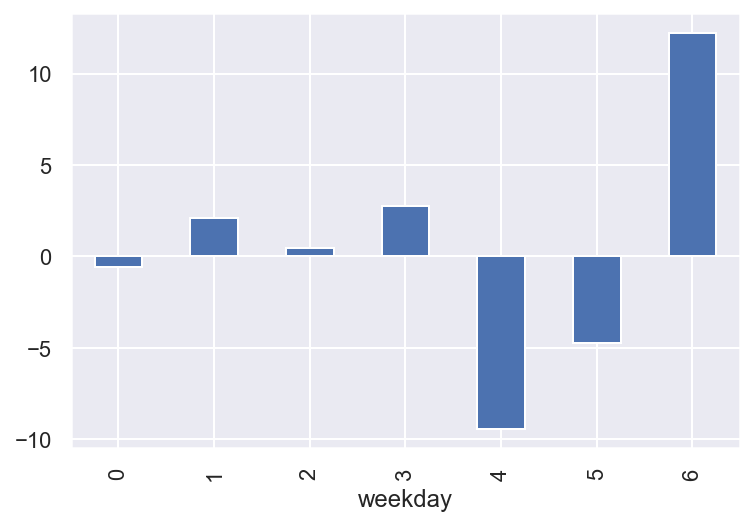

In [9]:
df.groupby('weekday').mean()['resid'].plot(kind='bar')

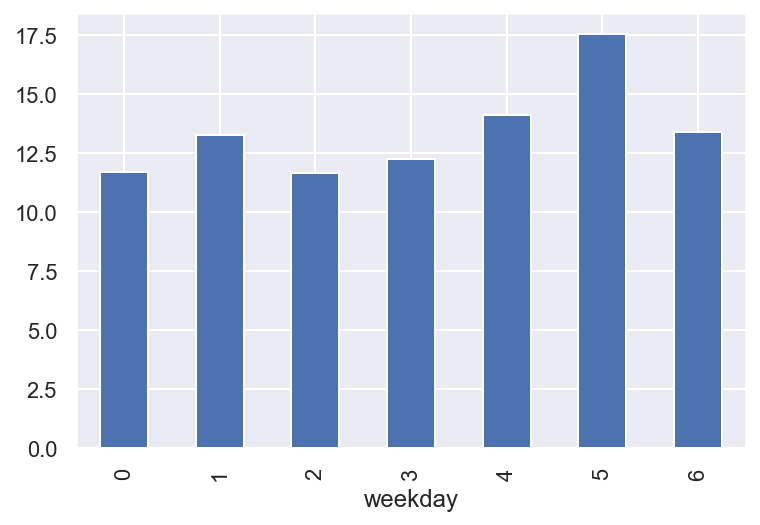

In [10]:
df.groupby('weekday').std()['resid'].plot(kind='bar')